In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
titanic_data =fetch_openml("titanic",version=1,as_frame=True)

In [3]:
df=titanic_data['data']

In [4]:
df['survived']=titanic_data['target']

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

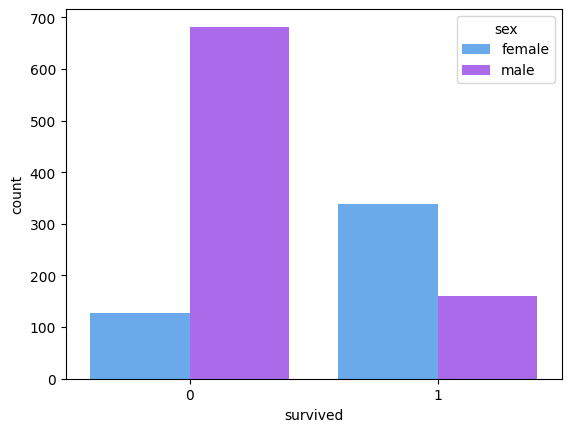

In [6]:
sns.countplot(x="survived",data=df,hue='sex',palette='cool')

In [7]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'mis_value_percentage'}>

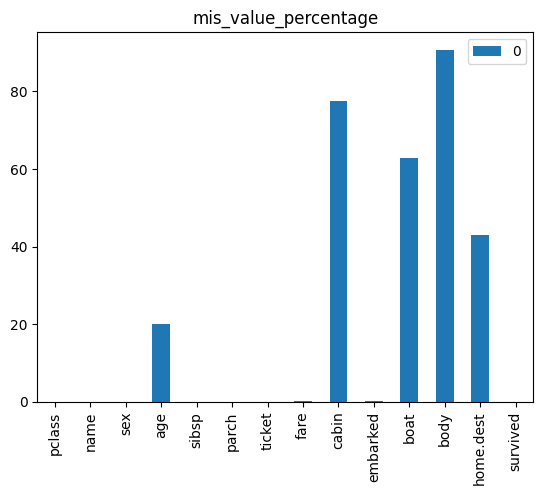

In [8]:
mis_value=pd.DataFrame(df.isnull().sum()/len(df)*100)
mis_value.plot(kind="bar",title="mis_value_percentage")

In [9]:
df['family']=df["sibsp"]+df["parch"]
df.loc[df["family"]>0,"travelled alone"]=0
df.loc[df["family"]==0,"travelled alone"]=1
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [10]:
df.drop(['sibsp','parch'],axis=1,inplace=True)


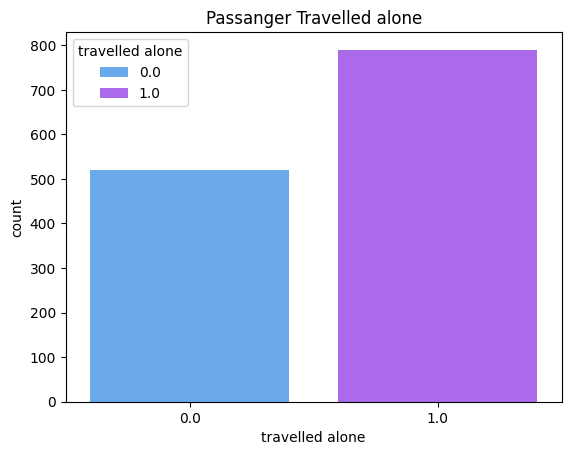

In [11]:
sns.countplot(x="travelled alone",data=df,hue="travelled alone",palette="cool")
plt.title("Passanger Travelled alone")
plt.show()

In [12]:
df

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [13]:
df.drop(['name','ticket','home.dest'],axis=1,inplace=True)

In [14]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [15]:
df.drop(['cabin','body','boat'],axis=1,inplace=True)

In [16]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [22]:
sex=pd.get_dummies(df['sex'],drop_first=True)
sex

,male
0,False
1,True
2,False
3,True
4,False
...,...
1304,False
1305,False
1306,True
1307,True


In [25]:
df['sex']=sex
df

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,False,29.0000,211.3375,S,1,0,1.0
1,1,True,0.9167,151.5500,S,1,3,0.0
2,1,False,2.0000,151.5500,S,0,3,0.0
3,1,True,30.0000,151.5500,S,0,3,0.0
4,1,False,25.0000,151.5500,S,0,3,0.0
...,...,...,...,...,...,...,...,...
1304,3,False,14.5000,14.4542,C,0,1,0.0
1305,3,False,NaN,14.4542,C,0,1,0.0
1306,3,True,26.5000,7.2250,C,0,0,1.0
1307,3,True,27.0000,7.2250,C,0,0,1.0


In [26]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled alone      0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [30]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled alone    0
dtype: int64

In [31]:
df

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,False,29.000000,211.3375,S,1,0,1.0
1,1,True,0.916700,151.5500,S,1,3,0.0
2,1,False,2.000000,151.5500,S,0,3,0.0
3,1,True,30.000000,151.5500,S,0,3,0.0
4,1,False,25.000000,151.5500,S,0,3,0.0
...,...,...,...,...,...,...,...,...
1304,3,False,14.500000,14.4542,C,0,1,0.0
1305,3,False,29.881135,14.4542,C,0,1,0.0
1306,3,True,26.500000,7.2250,C,0,0,1.0
1307,3,True,27.000000,7.2250,C,0,0,1.0


In [37]:
imp_freq=SimpleImputer(strategy='most_frequent')


In [59]:
df[['embarked']]=imp_freq.fit_transform(df[['embarked']])

In [60]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled alone    0
dtype: int64

In [62]:
embark=pd.get_dummies(df['embarked'],drop_first=True)
print(embark)

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [63]:
df.drop(['embarked'],axis=1,inplace=True)
df=pd.concat([df,embark],axis=1)

In [64]:
df.head()

,pclass,sex,age,fare,survived,family,travelled alone,Q,S
0,1,False,29.0000,211.3375,1,0,1.0,False,True
1,1,True,0.9167,151.5500,1,3,0.0,False,True
2,1,False,2.0000,151.5500,0,3,0.0,False,True
3,1,True,30.0000,151.5500,0,3,0.0,False,True
4,1,False,25.0000,151.5500,0,3,0.0,False,True


In [66]:
X=df.drop(['survived'],axis=1)
X.head()

,pclass,sex,age,fare,family,travelled alone,Q,S
0,1,False,29.0000,211.3375,0,1.0,False,True
1,1,True,0.9167,151.5500,3,0.0,False,True
2,1,False,2.0000,151.5500,3,0.0,False,True
3,1,True,30.0000,151.5500,3,0.0,False,True
4,1,False,25.0000,151.5500,3,0.0,False,True


In [67]:
y=df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [70]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(916, 8) (916,)
(393, 8) (393,)


In [71]:
from sklearn.linear_model import LogisticRegression

In [74]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Anshil\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred=model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7989821882951654

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[204,  32],
       [ 47, 110]], dtype=int64)